# 01. 대사증후군

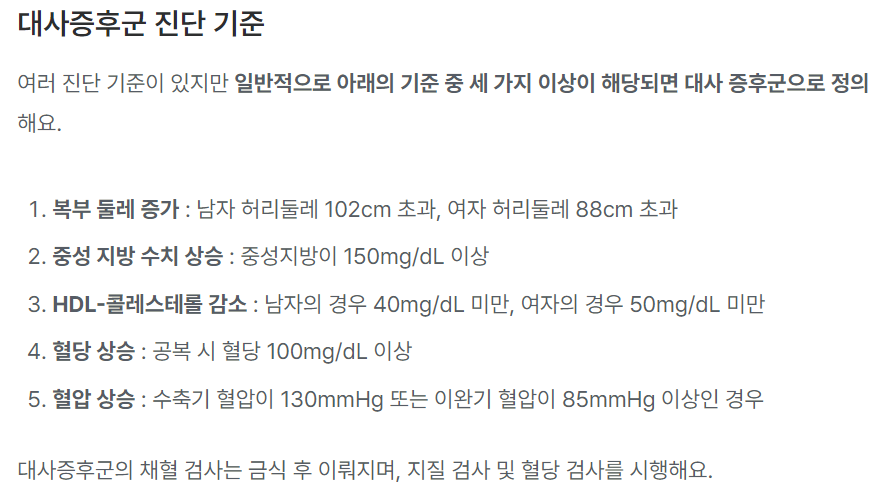

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
result_dic = {} # 딕셔너리 생성

## 2011년도 대사증후군 데이터

In [3]:
year = '2011'

df = pd.read_csv(f'NHIS{year}.CSV', encoding='CP949')
df.head(100)

unique_sido_codes = df['시도코드'].unique()
sido_dic = {}

for sido_code in unique_sido_codes:
    data_for_sido = df[df['시도코드'] == sido_code]

    # 1. 복부 둘레 증가
    filt1 = ((df['허리둘레'] >= 101) & (df['성별코드'] == 1)) | ((df['허리둘레'] >= 88) & (df['성별코드'] == 2))
    df.loc[filt1]

    # 2. 중성 지방 수치 상승
    filt2 = (df['트리글리세라이드'] >= 150)
    df.loc[filt2]

    # 3. HDL-콜레스테롤 감소
    filt3 = ((df['HDL콜레스테롤'] < 40) & (df['성별코드'] == 1) | (df['HDL콜레스테롤'] < 50) & (df['성별코드'] == 2))
    df.loc[filt3]

    # 4. 혈당 상승
    filt4 = (df['식전혈당(공복혈당)'] >= 100)
    df.loc[filt4]

    # 5. 혈압 상승
    filt5 = ((df['수축기혈압'] >= 130) | (df['이완기혈압'] >= 85))
    df.loc[filt5]

    # 3개 이상의 조건 만족
    filt_combined = (filt1.astype(int) + filt2.astype(int) + filt3.astype(int) + filt4.astype(int) + filt5.astype(int)) >= 3

        # 조건을 충족하는 행을 추출
    result_data = data_for_sido[filt_combined]

    # 조건을 충족하는 행의 개수를 계산
    count = result_data.shape[0]
    
    # 결과를 딕셔너리에 저장
    sido_dic[sido_code] = count
    

# 결과
for sido_code, count in sido_dic.items():
    print(f"시도 코드 {sido_code}: 대사증후군 조건 충족 행의 개수 = {count}")

    
result_df = df.loc[filt_combined]
# row_count = result_df.shape[0]
result_dic[2011] = sido_dic;

result_df

/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/3874212694.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'NHIS{year}.CSV', encoding='CP949')
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/3874212694.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/3874212694.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/3874212694.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/3874212694.py:36: UserWarning: Boolean Series key will be reindexed to match DataFra

시도 코드 47: 대사증후군 조건 충족 행의 개수 = 8682
시도 코드 26: 대사증후군 조건 충족 행의 개수 = 9385
시도 코드 27: 대사증후군 조건 충족 행의 개수 = 6122
시도 코드 46: 대사증후군 조건 충족 행의 개수 = 7112
시도 코드 31: 대사증후군 조건 충족 행의 개수 = 3705
시도 코드 45: 대사증후군 조건 충족 행의 개수 = 6041
시도 코드 41: 대사증후군 조건 충족 행의 개수 = 31536
시도 코드 44: 대사증후군 조건 충족 행의 개수 = 7309
시도 코드 29: 대사증후군 조건 충족 행의 개수 = 3712
시도 코드 43: 대사증후군 조건 충족 행의 개수 = 5211
시도 코드 11: 대사증후군 조건 충족 행의 개수 = 24507
시도 코드 42: 대사증후군 조건 충족 행의 개수 = 5284
시도 코드 30: 대사증후군 조건 충족 행의 개수 = 4058
시도 코드 48: 대사증후군 조건 충족 행의 개수 = 9152
시도 코드 49: 대사증후군 조건 충족 행의 개수 = 1311
시도 코드 28: 대사증후군 조건 충족 행의 개수 = 7859


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
221,2011,86261,2,1,28,155,50,66,1.0,1.2,...,11,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20
337,2011,919976,2,1,11,155,55,70,0.9,0.8,...,11,3.0,N,Y,Y,N,N,N,Y,2015-12-20
353,2011,494059,2,1,31,155,60,78,0.7,0.6,...,17,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20
386,2011,241261,2,1,42,155,70,83,1.2,1.2,...,22,1.0,Y,Y,Y,N,N,N,Y,2015-12-20
387,2011,293893,2,1,30,155,70,90,0.4,0.3,...,23,1.0,Y,Y,NaN,N,Y,N,Y,2015-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999981,2011,394477,2,14,44,140,35,70,0.1,0.2,...,23,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20
999982,2011,561236,2,14,11,140,35,60,0.2,0.2,...,23,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20
999984,2011,164194,2,14,46,140,40,60,0.1,0.1,...,26,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20
999986,2011,266398,2,14,26,145,40,79,0.2,0.1,...,12,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20


## 2012년도 대사증후군 데이터

In [4]:
year = '2012'

df = pd.read_csv(f'NHIS{year}.CSV', encoding='CP949')
df.head(100)

unique_sido_codes = df['시도코드'].unique()
sido_dic = {}

for sido_code in unique_sido_codes:
    data_for_sido = df[df['시도코드'] == sido_code]

    # 1. 복부 둘레 증가
    filt1 = ((df['허리둘레'] >= 101) & (df['성별코드'] == 1)) | ((df['허리둘레'] >= 88) & (df['성별코드'] == 2))
    df.loc[filt1]

    # 2. 중성 지방 수치 상승
    filt2 = (df['트리글리세라이드'] >= 150)
    df.loc[filt2]

    # 3. HDL-콜레스테롤 감소
    filt3 = ((df['HDL콜레스테롤'] < 40) & (df['성별코드'] == 1) | (df['HDL콜레스테롤'] < 50) & (df['성별코드'] == 2))
    df.loc[filt3]

    # 4. 혈당 상승
    filt4 = (df['식전혈당(공복혈당)'] >= 100)
    df.loc[filt4]

    # 5. 혈압 상승
    filt5 = ((df['수축기혈압'] >= 130) | (df['이완기혈압'] >= 85))
    df.loc[filt5]

    # 3개 이상의 조건 만족
    filt_combined = (filt1.astype(int) + filt2.astype(int) + filt3.astype(int) + filt4.astype(int) + filt5.astype(int)) >= 3

        # 조건을 충족하는 행을 추출
    result_data = data_for_sido[filt_combined]

    # 조건을 충족하는 행의 개수를 계산
    count = result_data.shape[0]
    
    # 결과를 딕셔너리에 저장
    sido_dic[sido_code] = count
    

# 결과
for sido_code, count in sido_dic.items():
    print(f"시도 코드 {sido_code}: 대사증후군 조건 충족 행의 개수 = {count}")

    
result_df = df.loc[filt_combined]
# row_count = result_df.shape[0]
result_dic[2012] = sido_dic;

result_df

/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/875683983.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/875683983.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/875683983.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/875683983.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/875683983.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[

시도 코드 46: 대사증후군 조건 충족 행의 개수 = 7202
시도 코드 45: 대사증후군 조건 충족 행의 개수 = 6200
시도 코드 26: 대사증후군 조건 충족 행의 개수 = 9333
시도 코드 11: 대사증후군 조건 충족 행의 개수 = 24173
시도 코드 28: 대사증후군 조건 충족 행의 개수 = 7982
시도 코드 41: 대사증후군 조건 충족 행의 개수 = 31128
시도 코드 47: 대사증후군 조건 충족 행의 개수 = 8620
시도 코드 44: 대사증후군 조건 충족 행의 개수 = 6921
시도 코드 43: 대사증후군 조건 충족 행의 개수 = 5428
시도 코드 27: 대사증후군 조건 충족 행의 개수 = 6130
시도 코드 42: 대사증후군 조건 충족 행의 개수 = 5281
시도 코드 30: 대사증후군 조건 충족 행의 개수 = 4091
시도 코드 48: 대사증후군 조건 충족 행의 개수 = 9170
시도 코드 31: 대사증후군 조건 충족 행의 개수 = 3576
시도 코드 29: 대사증후군 조건 충족 행의 개수 = 3820
시도 코드 49: 대사증후군 조건 충족 행의 개수 = 1565
시도 코드 36: 대사증후군 조건 충족 행의 개수 = 342


/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/875683983.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
327,2012,902101,2,1,41,155,55,76,0.7,0.8,...,12,3.0,N,Y,Y,N,N,N,Y,2015-12-20
374,2012,883987,2,1,41,155,70,80,0.7,0.7,...,65,1.0,Y,Y,Y,N,N,N,Y,2015-12-20
599,2012,38544,1,1,41,160,50,68,0.4,0.4,...,15,3.0,Y,Y,N,N,N,N,N,2015-12-20
718,2012,387436,2,1,47,160,60,70,1.5,1.2,...,29,1.0,Y,Y,Y,N,N,N,N,2015-12-20
865,2012,995794,1,1,41,165,50,72,1.2,0.9,...,27,1.0,Y,Y,Y,Y,N,N,Y,2015-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999983,2012,36863,2,14,11,145,50,88,0.4,0.2,...,12,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20
999984,2012,254388,2,14,11,150,45,76,0.8,0.8,...,13,1.0,N,Y,Y,Y,N,N,Y,2015-12-20
999992,2012,865661,2,14,43,140,35,67,0.3,0.2,...,9,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20
999993,2012,218995,2,14,30,140,35,82,9.9,0.2,...,15,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20


## 2013년도 대사증후군 데이터

In [5]:
year = '2013'

df = pd.read_csv(f'NHIS{year}.CSV', encoding='CP949')
df.head(100)

unique_sido_codes = df['시도코드'].unique()
sido_dic = {}

for sido_code in unique_sido_codes:
    data_for_sido = df[df['시도코드'] == sido_code]

    # 1. 복부 둘레 증가
    filt1 = ((df['허리둘레'] >= 101) & (df['성별코드'] == 1)) | ((df['허리둘레'] >= 88) & (df['성별코드'] == 2))
    df.loc[filt1]

    # 2. 중성 지방 수치 상승
    filt2 = (df['트리글리세라이드'] >= 150)
    df.loc[filt2]

    # 3. HDL-콜레스테롤 감소
    filt3 = ((df['HDL콜레스테롤'] < 40) & (df['성별코드'] == 1) | (df['HDL콜레스테롤'] < 50) & (df['성별코드'] == 2))
    df.loc[filt3]

    # 4. 혈당 상승
    filt4 = (df['식전혈당(공복혈당)'] >= 100)
    df.loc[filt4]

    # 5. 혈압 상승
    filt5 = ((df['수축기혈압'] >= 130) | (df['이완기혈압'] >= 85))
    df.loc[filt5]

    # 3개 이상의 조건 만족
    filt_combined = (filt1.astype(int) + filt2.astype(int) + filt3.astype(int) + filt4.astype(int) + filt5.astype(int)) >= 3

        # 조건을 충족하는 행을 추출
    result_data = data_for_sido[filt_combined]

    # 조건을 충족하는 행의 개수를 계산
    count = result_data.shape[0]
    
    # 결과를 딕셔너리에 저장
    sido_dic[sido_code] = count
    

# 결과
for sido_code, count in sido_dic.items():
    print(f"시도 코드 {sido_code}: 대사증후군 조건 충족 행의 개수 = {count}")

    
result_df = df.loc[filt_combined]
# row_count = result_df.shape[0]
result_dic[2013] = sido_dic;

result_df

/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/163748477.py:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'NHIS{year}.CSV', encoding='CP949')
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/163748477.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/163748477.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/163748477.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/163748477.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame in

시도 코드 11: 대사증후군 조건 충족 행의 개수 = 24349
시도 코드 27: 대사증후군 조건 충족 행의 개수 = 6559
시도 코드 29: 대사증후군 조건 충족 행의 개수 = 4024
시도 코드 43: 대사증후군 조건 충족 행의 개수 = 5385
시도 코드 41: 대사증후군 조건 충족 행의 개수 = 32264
시도 코드 47: 대사증후군 조건 충족 행의 개수 = 8963
시도 코드 48: 대사증후군 조건 충족 행의 개수 = 9507
시도 코드 45: 대사증후군 조건 충족 행의 개수 = 6336
시도 코드 26: 대사증후군 조건 충족 행의 개수 = 10122
시도 코드 44: 대사증후군 조건 충족 행의 개수 = 7204
시도 코드 42: 대사증후군 조건 충족 행의 개수 = 5133
시도 코드 28: 대사증후군 조건 충족 행의 개수 = 8545
시도 코드 49: 대사증후군 조건 충족 행의 개수 = 1573
시도 코드 46: 대사증후군 조건 충족 행의 개수 = 7239
시도 코드 31: 대사증후군 조건 충족 행의 개수 = 3627
시도 코드 30: 대사증후군 조건 충족 행의 개수 = 4268
시도 코드 36: 대사증후군 조건 충족 행의 개수 = 403


/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/163748477.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,Unnamed: 34,Unnamed: 35
0,2013,24193,2,14,11,145,35,83,0.1,0.1,...,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20,NaN,NaN
66,2013,10290,1,1,27,150,50,81,0.8,0.8,...,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20,NaN,NaN
93,2013,436989,2,1,41,150,65,79,1.2,1.0,...,Y,Y,N,N,N,N,Y,2015-12-20,NaN,NaN
408,2013,230766,2,1,26,155,80,98,0.2,0.2,...,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20,NaN,NaN
757,2013,874569,2,1,41,160,60,85,1.0,0.9,...,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999974,2013,315109,2,14,44,140,40,80,0.1,0.1,...,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20,NaN,NaN
999982,2013,532686,2,14,41,145,50,85,0.3,0.3,...,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20,NaN,NaN
999987,2013,481860,2,14,46,150,40,72,0.5,0.6,...,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20,NaN,NaN
999991,2013,587149,2,14,41,150,50,83,0.1,0.1,...,N,N,NaN,NaN,NaN,NaN,NaN,2015-12-20,NaN,NaN


## 2014년도 대사증후군 데이터

In [6]:
year = '2014'

df = pd.read_csv(f'NHIS{year}.CSV', encoding='CP949')
df.head(100)

unique_sido_codes = df['시도코드'].unique()
sido_dic = {}

for sido_code in unique_sido_codes:
    data_for_sido = df[df['시도코드'] == sido_code]

    # 1. 복부 둘레 증가
    filt1 = ((df['허리둘레'] >= 101) & (df['성별코드'] == 1)) | ((df['허리둘레'] >= 88) & (df['성별코드'] == 2))
    df.loc[filt1]

    # 2. 중성 지방 수치 상승
    filt2 = (df['트리글리세라이드'] >= 150)
    df.loc[filt2]

    # 3. HDL-콜레스테롤 감소
    filt3 = ((df['HDL콜레스테롤'] < 40) & (df['성별코드'] == 1) | (df['HDL콜레스테롤'] < 50) & (df['성별코드'] == 2))
    df.loc[filt3]

    # 4. 혈당 상승
    filt4 = (df['식전혈당(공복혈당)'] >= 100)
    df.loc[filt4]

    # 5. 혈압 상승
    filt5 = ((df['수축기혈압'] >= 130) | (df['이완기혈압'] >= 85))
    df.loc[filt5]

    # 3개 이상의 조건 만족
    filt_combined = (filt1.astype(int) + filt2.astype(int) + filt3.astype(int) + filt4.astype(int) + filt5.astype(int)) >= 3

        # 조건을 충족하는 행을 추출
    result_data = data_for_sido[filt_combined]

    # 조건을 충족하는 행의 개수를 계산
    count = result_data.shape[0]
    
    # 결과를 딕셔너리에 저장
    sido_dic[sido_code] = count
    

# 결과
for sido_code, count in sido_dic.items():
    print(f"시도 코드 {sido_code}: 대사증후군 조건 충족 행의 개수 = {count}")

    
result_df = df.loc[filt_combined]
# row_count = result_df.shape[0]
result_dic[2014] = sido_dic;

result_df

/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/3898266739.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/3898266739.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/3898266739.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/3898266739.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/3898266739.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_

시도 코드 42: 대사증후군 조건 충족 행의 개수 = 5315
시도 코드 41: 대사증후군 조건 충족 행의 개수 = 33338
시도 코드 44: 대사증후군 조건 충족 행의 개수 = 7399
시도 코드 47: 대사증후군 조건 충족 행의 개수 = 9127
시도 코드 45: 대사증후군 조건 충족 행의 개수 = 6365
시도 코드 26: 대사증후군 조건 충족 행의 개수 = 9666
시도 코드 46: 대사증후군 조건 충족 행의 개수 = 7267
시도 코드 29: 대사증후군 조건 충족 행의 개수 = 4025
시도 코드 48: 대사증후군 조건 충족 행의 개수 = 9683
시도 코드 43: 대사증후군 조건 충족 행의 개수 = 5260
시도 코드 11: 대사증후군 조건 충족 행의 개수 = 24280
시도 코드 30: 대사증후군 조건 충족 행의 개수 = 4468
시도 코드 28: 대사증후군 조건 충족 행의 개수 = 8827
시도 코드 31: 대사증후군 조건 충족 행의 개수 = 3504
시도 코드 27: 대사증후군 조건 충족 행의 개수 = 6465
시도 코드 36: 대사증후군 조건 충족 행의 개수 = 375
시도 코드 49: 대사증후군 조건 충족 행의 개수 = 1609


/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/3898266739.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
3,2014,4,2,11,41,165,80,104,0.8,0.2,...,0.9,19,14,21,1.0,N,Y,N,Y,2016-12-20
7,2014,8,2,11,41,145,55,93,0.9,0.9,...,1.2,34,16,175,1.0,Y,N,NaN,NaN,2016-12-20
26,2014,27,2,18,11,150,65,95,0.4,0.3,...,0.9,24,13,26,1.0,Y,Y,NaN,N,2016-12-20
27,2014,28,2,18,41,155,60,86,0.6,0.6,...,1.1,18,11,13,1.0,Y,N,NaN,NaN,2016-12-20
29,2014,30,2,11,26,155,70,84,0.7,0.7,...,0.9,37,36,23,1.0,Y,N,NaN,NaN,2016-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999970,2014,999971,1,11,43,170,75,85,0.5,1.0,...,1.1,19,11,27,3.0,N,N,NaN,NaN,2016-12-20
999974,2014,999975,1,8,43,180,70,93,1.2,0.9,...,0.9,23,23,90,3.0,Y,N,NaN,NaN,2016-12-20
999977,2014,999978,1,7,11,170,70,80,0.5,0.8,...,0.8,17,15,17,1.0,Y,N,NaN,NaN,2016-12-20
999984,2014,999985,2,10,36,165,70,82,1.2,0.7,...,1.0,20,20,16,1.0,Y,N,NaN,NaN,2016-12-20


## 2015년도 대사증후군 데이터

In [7]:
year = '2015'

df = pd.read_csv(f'NHIS{year}.CSV', encoding='CP949')
df.head(100)

unique_sido_codes = df['시도코드'].unique()
sido_dic = {}

for sido_code in unique_sido_codes:
    data_for_sido = df[df['시도코드'] == sido_code]

    # 1. 복부 둘레 증가
    filt1 = ((df['허리둘레'] >= 101) & (df['성별코드'] == 1)) | ((df['허리둘레'] >= 88) & (df['성별코드'] == 2))
    df.loc[filt1]

    # 2. 중성 지방 수치 상승
    filt2 = (df['트리글리세라이드'] >= 150)
    df.loc[filt2]

    # 3. HDL-콜레스테롤 감소
    filt3 = ((df['HDL콜레스테롤'] < 40) & (df['성별코드'] == 1) | (df['HDL콜레스테롤'] < 50) & (df['성별코드'] == 2))
    df.loc[filt3]

    # 4. 혈당 상승
    filt4 = (df['식전혈당(공복혈당)'] >= 100)
    df.loc[filt4]

    # 5. 혈압 상승
    filt5 = ((df['수축기혈압'] >= 130) | (df['이완기혈압'] >= 85))
    df.loc[filt5]

    # 3개 이상의 조건 만족
    filt_combined = (filt1.astype(int) + filt2.astype(int) + filt3.astype(int) + filt4.astype(int) + filt5.astype(int)) >= 3

        # 조건을 충족하는 행을 추출
    result_data = data_for_sido[filt_combined]

    # 조건을 충족하는 행의 개수를 계산
    count = result_data.shape[0]
    
    # 결과를 딕셔너리에 저장
    sido_dic[sido_code] = count
    

# 결과
for sido_code, count in sido_dic.items():
    print(f"시도 코드 {sido_code}: 대사증후군 조건 충족 행의 개수 = {count}")

    
result_df = df.loc[filt_combined]
# row_count = result_df.shape[0]
result_dic[2015] = sido_dic;

result_df

/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/1370111115.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/1370111115.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/1370111115.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/1370111115.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/1370111115.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_

시도 코드 45: 대사증후군 조건 충족 행의 개수 = 6556
시도 코드 11: 대사증후군 조건 충족 행의 개수 = 25938
시도 코드 26: 대사증후군 조건 충족 행의 개수 = 9978
시도 코드 41: 대사증후군 조건 충족 행의 개수 = 35123
시도 코드 47: 대사증후군 조건 충족 행의 개수 = 8777
시도 코드 44: 대사증후군 조건 충족 행의 개수 = 7249
시도 코드 43: 대사증후군 조건 충족 행의 개수 = 5242
시도 코드 46: 대사증후군 조건 충족 행의 개수 = 7367
시도 코드 30: 대사증후군 조건 충족 행의 개수 = 4462
시도 코드 48: 대사증후군 조건 충족 행의 개수 = 9631
시도 코드 49: 대사증후군 조건 충족 행의 개수 = 1564
시도 코드 28: 대사증후군 조건 충족 행의 개수 = 9056
시도 코드 29: 대사증후군 조건 충족 행의 개수 = 4232
시도 코드 27: 대사증후군 조건 충족 행의 개수 = 6746
시도 코드 42: 대사증후군 조건 충족 행의 개수 = 5461
시도 코드 31: 대사증후군 조건 충족 행의 개수 = 3726
시도 코드 36: 대사증후군 조건 충족 행의 개수 = 409


/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/1370111115.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
0,2015,1,2,15,45,155,60,88,0.6,0.7,...,1.1,17,28,23,1.0,Y,N,NaN,NaN,2016-12-20
1,2015,2,2,15,11,155,65,98,1.2,0.6,...,1.0,25,30,41,1.0,Y,Y,NaN,N,2016-12-20
3,2015,4,1,9,41,175,75,89,0.2,0.2,...,0.9,28,40,50,1.0,Y,Y,N,NaN,2016-12-20
13,2015,14,1,18,30,160,60,85,0.7,0.6,...,1.1,28,20,43,3.0,Y,Y,NaN,N,2016-12-20
14,2015,15,2,18,46,150,55,82,0.8,0.5,...,0.8,45,37,69,1.0,Y,N,NaN,NaN,2016-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999882,2015,999883,1,13,44,165,55,75,0.3,0.5,...,0.8,31,18,59,3.0,N,Y,NaN,Y,2016-12-20
999883,2015,999884,1,8,41,165,60,74,1.2,1.0,...,0.9,31,41,22,1.0,Y,N,NaN,NaN,2016-12-20
999891,2015,999892,1,7,41,180,105,99,1.2,1.5,...,1.2,57,55,139,3.0,Y,N,NaN,NaN,2016-12-20
999966,2015,999967,1,6,43,180,85,87,1.5,0.8,...,1.1,22,24,58,1.0,Y,Y,NaN,NaN,2016-12-20


## 2016년도 대사증후군 데이터

In [8]:
year = '2016'

df = pd.read_csv(f'NHIS{year}.CSV', encoding='CP949')
df.head(100)

unique_sido_codes = df['시도코드'].unique()
sido_dic = {}

for sido_code in unique_sido_codes:
    data_for_sido = df[df['시도코드'] == sido_code]

    # 1. 복부 둘레 증가
    filt1 = ((df['허리둘레'] >= 101) & (df['성별코드'] == 1)) | ((df['허리둘레'] >= 88) & (df['성별코드'] == 2))
    df.loc[filt1]

    # 2. 중성 지방 수치 상승
    filt2 = (df['트리글리세라이드'] >= 150)
    df.loc[filt2]

    # 3. HDL-콜레스테롤 감소
    filt3 = ((df['HDL콜레스테롤'] < 40) & (df['성별코드'] == 1) | (df['HDL콜레스테롤'] < 50) & (df['성별코드'] == 2))
    df.loc[filt3]

    # 4. 혈당 상승
    filt4 = (df['식전혈당(공복혈당)'] >= 100)
    df.loc[filt4]

    # 5. 혈압 상승
    filt5 = ((df['수축기혈압'] >= 130) | (df['이완기혈압'] >= 85))
    df.loc[filt5]

    # 3개 이상의 조건 만족
    filt_combined = (filt1.astype(int) + filt2.astype(int) + filt3.astype(int) + filt4.astype(int) + filt5.astype(int)) >= 3

        # 조건을 충족하는 행을 추출
    result_data = data_for_sido[filt_combined]

    # 조건을 충족하는 행의 개수를 계산
    count = result_data.shape[0]
    
    # 결과를 딕셔너리에 저장
    sido_dic[sido_code] = count
    

# 결과
for sido_code, count in sido_dic.items():
    print(f"시도 코드 {sido_code}: 대사증후군 조건 충족 행의 개수 = {count}")

    
result_df = df.loc[filt_combined]
# row_count = result_df.shape[0]
result_dic[2016] = sido_dic;

result_df

/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/2726883083.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/2726883083.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/2726883083.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/2726883083.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/2726883083.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_

시도 코드 27: 대사증후군 조건 충족 행의 개수 = 7165
시도 코드 41: 대사증후군 조건 충족 행의 개수 = 37027
시도 코드 43: 대사증후군 조건 충족 행의 개수 = 5296
시도 코드 48: 대사증후군 조건 충족 행의 개수 = 9599
시도 코드 11: 대사증후군 조건 충족 행의 개수 = 26172
시도 코드 46: 대사증후군 조건 충족 행의 개수 = 7578
시도 코드 31: 대사증후군 조건 충족 행의 개수 = 3904
시도 코드 28: 대사증후군 조건 충족 행의 개수 = 9371
시도 코드 26: 대사증후군 조건 충족 행의 개수 = 9687
시도 코드 30: 대사증후군 조건 충족 행의 개수 = 4391
시도 코드 42: 대사증후군 조건 충족 행의 개수 = 5572
시도 코드 29: 대사증후군 조건 충족 행의 개수 = 4435
시도 코드 44: 대사증후군 조건 충족 행의 개수 = 7498
시도 코드 45: 대사증후군 조건 충족 행의 개수 = 6840
시도 코드 47: 대사증후군 조건 충족 행의 개수 = 8933
시도 코드 49: 대사증후군 조건 충족 행의 개수 = 1752
시도 코드 36: 대사증후군 조건 충족 행의 개수 = 640


/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_46316/2726883083.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
1,2016,2,2,11,41,160.0,65.0,85.0,1.5,1.2,...,19.0,1.0,NaN,N,NaN,NaN,NaN,NaN,NaN,2017-12-19
7,2016,8,2,16,48,155.0,60.0,81.0,0.7,0.5,...,14.0,1.0,NaN,N,NaN,NaN,NaN,NaN,NaN,2017-12-19
24,2016,25,1,13,11,170.0,70.0,92.0,0.9,1.2,...,61.0,2.0,NaN,N,NaN,NaN,NaN,NaN,NaN,2017-12-19
26,2016,27,1,16,27,165.0,65.0,95.0,0.8,0.8,...,14.0,1.0,NaN,N,NaN,NaN,NaN,NaN,NaN,2017-12-19
30,2016,31,1,9,11,175.0,85.0,97.0,1.2,1.2,...,105.0,2.0,NaN,N,NaN,NaN,NaN,NaN,NaN,2017-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999975,2016,999976,1,13,26,170.0,75.0,85.0,1.0,1.2,...,21.0,1.0,NaN,N,NaN,NaN,NaN,NaN,NaN,2017-12-19
999983,2016,999984,1,11,11,175.0,80.0,83.0,1.0,1.2,...,25.0,1.0,NaN,Y,NaN,NaN,NaN,NaN,Y,2017-12-19
999988,2016,999989,1,9,45,170.0,80.0,90.0,2.0,1.5,...,52.0,3.0,NaN,N,NaN,NaN,NaN,NaN,NaN,2017-12-19
999990,2016,999991,2,11,41,150.0,75.0,99.0,0.5,0.5,...,31.0,1.0,NaN,N,NaN,NaN,NaN,NaN,NaN,2017-12-19


## 2017년도 대사증후군 데이터

In [11]:
year = '2017'

df = pd.read_csv(f'NHIS{year}.CSV', encoding='CP949')
df.head(100)

unique_sido_codes = df['시도코드'].unique()
sido_dic = {}

for sido_code in unique_sido_codes:
    data_for_sido = df[df['시도코드'] == sido_code]

    # 1. 복부 둘레 증가
    filt1 = ((df['허리둘레'] >= 101) & (df['성별코드'] == 1)) | ((df['허리둘레'] >= 88) & (df['성별코드'] == 2))
    df.loc[filt1]

    # 2. 중성 지방 수치 상승
    filt2 = (df['트리글리세라이드'] >= 150)
    df.loc[filt2]

    # 3. HDL-콜레스테롤 감소
    filt3 = ((df['HDL콜레스테롤'] < 40) & (df['성별코드'] == 1) | (df['HDL콜레스테롤'] < 50) & (df['성별코드'] == 2))
    df.loc[filt3]

    # 4. 혈당 상승
    filt4 = (df['식전혈당(공복혈당)'] >= 100)
    df.loc[filt4]

    # 5. 혈압 상승
    filt5 = ((df['수축기혈압'] >= 130) | (df['이완기혈압'] >= 85))
    df.loc[filt5]

    # 3개 이상의 조건 만족
    filt_combined = (filt1.astype(int) + filt2.astype(int) + filt3.astype(int) + filt4.astype(int) + filt5.astype(int)) >= 3

        # 조건을 충족하는 행을 추출
    result_data = data_for_sido[filt_combined]

    # 조건을 충족하는 행의 개수를 계산
    count = result_data.shape[0]
    
    # 결과를 딕셔너리에 저장
    sido_dic[sido_code] = count
    
res = 0;
# 결과
for sido_code, count in sido_dic.items():
    print(f"시도 코드 {sido_code}: 대사증후군 조건 충족 행의 개수 = {count}")
    res += count;
    
result_df = df.loc[filt_combined]
# row_count = result_df.shape[0]
result_dic[2017] = sido_dic;
print(res);
result_df

/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/1462688573.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/1462688573.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/1462688573.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/1462688573.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]
/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/1462688573.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_

시도 코드 43: 대사증후군 조건 충족 행의 개수 = 5665
시도 코드 11: 대사증후군 조건 충족 행의 개수 = 26234
시도 코드 41: 대사증후군 조건 충족 행의 개수 = 38374
시도 코드 48: 대사증후군 조건 충족 행의 개수 = 9586
시도 코드 30: 대사증후군 조건 충족 행의 개수 = 4568
시도 코드 27: 대사증후군 조건 충족 행의 개수 = 6830
시도 코드 47: 대사증후군 조건 충족 행의 개수 = 8948
시도 코드 42: 대사증후군 조건 충족 행의 개수 = 5522
시도 코드 28: 대사증후군 조건 충족 행의 개수 = 9383
시도 코드 44: 대사증후군 조건 충족 행의 개수 = 7690
시도 코드 45: 대사증후군 조건 충족 행의 개수 = 6425
시도 코드 26: 대사증후군 조건 충족 행의 개수 = 9522
시도 코드 29: 대사증후군 조건 충족 행의 개수 = 4305
시도 코드 31: 대사증후군 조건 충족 행의 개수 = 3800
시도 코드 46: 대사증후군 조건 충족 행의 개수 = 7495
시도 코드 36: 대사증후군 조건 충족 행의 개수 = 625
시도 코드 50: 대사증후군 조건 충족 행의 개수 = 1643
156615


/var/folders/45/ys98fp91091_09_qm35k9bm80000gn/T/ipykernel_50793/1462688573.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_data = data_for_sido[filt_combined]


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
12,2017,13,2,12,41,150,55,72.3,1.2,0.9,...,31.0,1.0,N,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
19,2017,20,1,13,44,165,60,85.0,0.3,0.7,...,48.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
22,2017,23,2,10,45,155,50,62.0,0.5,0.7,...,60.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
37,2017,38,2,13,42,150,50,77.0,1.2,1.2,...,48.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
41,2017,42,2,9,41,160,55,69.0,0.9,1.2,...,23.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999969,2017,999970,2,12,47,160,70,91.2,1.2,1.0,...,25.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999973,2017,999974,2,13,11,155,55,70.0,1.2,1.0,...,19.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999974,2017,999975,2,13,11,155,50,69.5,0.9,0.9,...,25.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999977,2017,999978,1,8,27,175,85,96.0,1.0,1.2,...,37.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26


## 결과: 대사증후군 증가율

In [5]:
year_list = [2011, 2012, 2013, 2014, 2015, 2016, 2017]
sido_name_dic = {
    11: '서울특별시',
    26: '부산광역시',
    27: '대구광역시',
    28: '인천광역시',
    29: '광주광역시',
    30: '대전광역시',
    31: '울산광역시',
    36: '세종특별자치시',
    41: '경기도',
    42: '강원도',
    43: '충청북도',
    44: '충청남도',
    45: '전라북도',
    46: '전라남도',
    47: '경상북도',
    48: '경상남도',
    49: '제주특별자치도'
}

result_dic
sido_dic
sido_name_dic

print(result_dic);
print(sido_name_dic);

# plt.figure(figsize=(10, 8))
# plt.plot(year_list, result_list, marker='o')

# for idx, txt in enumerate(result_list):
#     plt.text(year_list[idx], result_list[idx] + 500, txt, ha='center')

# plt.show()

{2011: {47: 8682, 26: 9385, 27: 6122, 46: 7112, 31: 3705, 45: 6041, 41: 31536, 44: 7309, 29: 3712, 43: 5211, 11: 24507, 42: 5284, 30: 4058, 48: 9152, 49: 1311, 28: 7859}, 2017: {43: 5665, 11: 26234, 41: 38374, 48: 9586, 30: 4568, 27: 6830, 47: 8948, 42: 5522, 28: 9383, 44: 7690, 45: 6425, 26: 9522, 29: 4305, 31: 3800, 46: 7495, 36: 625, 50: 1643}}
{11: '서울특별시', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시', 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종특별자치시', 41: '경기도', 42: '강원도', 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주특별자치도'}


## 결과: CSV저장

In [10]:
# 2011~2017 실행 후 실행시 연도,시도코드,시도이름,인원수 나옴
# data = []
# for year, year_data in result_dic.items():
#     for sido_code, count in year_data.items():
#         # sido_name_dic에서 sido_code 키가 존재하는지 확인
#         if sido_code in sido_name_dic:
#             sido_name = sido_name_dic[sido_code]
#             data.append([year, sido_code, sido_name, count])

# # 데이터프레임 생성
# df = pd.DataFrame(data, columns=['연도', '시도코드', '시도이름', '인원'])

# # 데이터프레임을 CSV 파일로 저장
# df.to_csv('result_data.csv', index=False, encoding='utf-8')
# df

#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 2011~2017만 돌리고 실행시 시도코드, 시도이름, 확률 나옴
data = []
for sido_code, sido_name in sido_name_dic.items():
    # 2011년과 2017년의 인원수
    count_2011 = result_dic.get(2011, {}).get(sido_code, 0)
    count_2017 = result_dic.get(2017, {}).get(sido_code, 0)
    
    # 퍼센트 계산
    percent = ((count_2017 - count_2011) / count_2011) * 100 if count_2011 > 0 else 0
    
    data.append([sido_code, sido_name, percent])

# 데이터프레임 생성
df = pd.DataFrame(data, columns=['시도코드', '시도이름', '2011-2017대사증후군증가율'])

# 데이터프레임을 CSV 파일로 저장
df.to_csv('result_data.csv', index=False, encoding='utf-8')
df


,시도코드,시도이름,2011-2017대사증후군증가율
0,11,서울특별시,7.046966
1,26,부산광역시,1.459776
2,27,대구광역시,11.564848
3,28,인천광역시,19.391780
4,29,광주광역시,15.975216
5,30,대전광역시,12.567767
6,31,울산광역시,2.564103
7,36,세종특별자치시,0.000000
8,41,경기도,21.683156
9,42,강원도,4.504164
